# **Residential Building Price Prediction**

Data set includes construction cost, sale prices, project variables, and economic variables corresponding to real estate single-family residential apartments in Tehran, Iran.

Source : https://archive.ics.uci.edu/ml/datasets/Residential+Building+Data+Set#

#**Data Dictionary**
The features for the dataset are as follows:

**V-1** Project locality defined in terms of zip codes

**V-2** Total floor area of the building

**V-3** Lot area

**V-4** Total preliminary estimated construction cost based on the prices at the beginning of the project

**V-5** Preliminary estimated construction cost based on the prices at the beginning of the project

**V-6** Equivalent preliminary estimated construction cost based on the prices at the beginning of the project in a selected base year 

**V-7** Duration of construction

**V-8** Price of the unit at the beginning of the project per m2

**V-9** Actual sales prices (output)

**V-10** Actual construction costs (output) 

**V-11** The number of building permits issued

**V-12** Building services index (BSI) b for a preselected base year

**V-13** Wholesale price index (WPI) c of building materials for the base year

**V-14** Total floor areas of building permits issued by the city/municipality

**V-15** Cumulative liquidity 

**V-16** Private sector investment in new buildings 

**V-17** Land price index for the base year

**V-18** The number of loans extended by banks in a time resolution

**V-19** The amount of loans extended by banks in a time resolution

**V-20** The interest rate for loan in a time resolution

**V-21** The average construction cost of buildings by private sector at the time of completion of construction 

**V-22** The average of construction cost of buildings by private sector at the beginning of the construction 

**V-23** Official exchange rate with respect to dollars 

**V-24** Nonofficial (street market) exchange rate with respect to dollars

**V-25** Consumer price index (CPI) i in the base year

**V-26** CPI of housing, water, fuel & power in the base year

**V-27** Stock market index

**V-28** Population of the city

**V-29** Gold price per ounce

#**Libraries**

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns

import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math
import seaborn as sns
from datetime import datetime
from numpy import absolute

In [ ]:
# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

#**Read Data**

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read 
file_ = "/content/drive/MyDrive/Residential Building.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file

#**EDA**

In [ ]:
# print first 5 rows of dataframe 
df.head()

,PROJECT DATES (PERSIAN CALENDAR),Unnamed: 1,Unnamed: 2,Unnamed: 3,PROJECT PHYSICAL AND FINANCIAL VARIABLES,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,ECONOMIC VARIABLES AND INDICES IN TIME LAG 1,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,ECONOMIC VARIABLES AND INDICES IN TIME LAG 2,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,ECONOMIC VARIABLES AND INDICES IN TIME LAG 4,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,ECONOMIC VARIABLES AND INDICES IN TIME LAG 5,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,OUTPUTS,Unnamed: 108
0,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,...,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9,V-10
1,81.00,1.00,85.00,1.00,1.00,3150.00,920.00,598.50,190.00,1010.84,16.00,1200.00,6713,56.2,61.52,6.11,320957.3,3485.8,64.5,239.5,12456.6,15,797.3,809.8,1755,8003,67.81,63.25,3758.77,42587,628132.9,4986,55.5,60.78,3.94,297210.1,3663.5,61.5,179.63,9342.45,...,5728,52.4,57.65,5.4,262789,2931.4,54.2,59.88,3114.15,15,746.8,815.5,1755,8013,62.78,56.45,3387.72,10646.75,606524.2,7196,51.3,56.13,5.97,249110.7,2562.3,52.8,217,10445.6,15,733.8,815.5,1755,8002,60.74,54.26,2978.26,41407,601988.1,2200.00,410.00
2,84.00,1.00,89.00,4.00,1.00,7600.00,1140.00,3040.00,400.00,963.81,23.00,2900.00,3152,106,103.03,3.15,685697.5,3526.1,105.5,208.8,17584.3,15,1408.4,1473.5,8842.18,8864,105.52,105.32,12113.01,45966,1188995.8,2700,103,101.84,2.65,625829.2,4386.9,100.4,156.6,13188.23,...,3157,92.8,96.49,3.05,552124.4,3896.7,96.9,52.2,4396.08,15,1294.2,1288,8555.54,8585,95.35,94.34,12063.5,11491.5,954628.6,3678,86.2,83.21,3.25,526596.4,2790.6,94.1,334.8,14488.6,15,1143.8,1316.3,8364.78,8393,90.95,89.79,11379.37,44835,929027.1,5000.00,1000.00
3,78.00,1.00,81.00,4.00,1.00,4800.00,840.00,480.00,100.00,689.84,15.00,630.00,1627,41,41.25,1.74,160401.5,1217.5,34.4,285.8,6489.1,15,614,608.2,1755,7773,45.91,38.34,1537.96,39066,524764.8,1580,40.3,40.84,1.15,150266.8,1149.5,34.1,214.35,4866.83,...,2374,38,39.43,0.92,134548.4,1191.1,33.7,71.45,1622.28,15,574.6,680.5,1755,5565,41.03,33.37,1601.79,9766.5,403875,2693,36.2,37.64,1.55,134312.5,1529,31.43,175.7,3994.7,15,589.5,765.8,1755,4930,38.7,32.04,1653.06,37933,377828.6,1200.00,170.00
4,72.00,2.00,73.00,2.00,1.00,685.00,202.00,13.70,20.00,459.54,4.00,140.00,2580.93,12.1,10.03,1.24,38193.64,287.2,13.6,17.03,154.4,12,183.6,211.1,1612.95,1649,11.62,10.06,392.96,8435.75,141542.6,2952,11.6,8.5,1.99,35859.4,322.5,12.67,56.6,610.4,...,2312,10.6,5.44,2.58,30012.46,345.3,10.79,28.3,305.2,12,180.3715071,158.45,1439,1450,9.91,8.85,590.64,16388,121857.2,1381,10,3.91,3,27231.21,316.5,9.85,14.15,152.6,12,197.6795574,152.25,1442.31,1456,9.73,8.34,686.16,8194,122031.7,165.00,30.00


In [ ]:
# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

Shape (372, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V-1     372 non-null    float64
 1   V-2     372 non-null    float64
 2   V-3     372 non-null    float64
 3   V-4     372 non-null    float64
 4   V-5     372 non-null    float64
 5   V-6     372 non-null    float64
 6   V-7     372 non-null    float64
 7   V-8     372 non-null    float64
 8   V-11    372 non-null    float64
 9   V-12    372 non-null    float64
 10  V-13    372 non-null    float64
 11  V-14    372 non-null    float64
 12  V-15    372 non-null    float64
 13  V-16    372 non-null    float64
 14  V-17    372 non-null    float64
 15  V-18    372 non-null    float64
 16  V-19    372 non-null    float64
 17  V-20    372 non-null    int64  
 18  V-21    372 non-null    float64
 19  V-22    372 non-null    float64
 20  V-23    372 non-null    float64
 21  V-24    372 non-null   

In [ ]:
# Describe Dataset 
print("\n DESCRIBE\n",df.describe())


 DESCRIBE
               V-1           V-2  ...          V-9         V-10
count  372.000000    372.000000  ...   372.000000   372.000000
mean     9.728495   1729.044355  ...  1387.432796   232.647849
std      6.563309   1802.371491  ...  1206.083047   162.627656
min      1.000000    200.000000  ...    50.000000    20.000000
25%      4.000000    720.000000  ...   577.500000   110.000000
50%      8.000000   1220.000000  ...  1000.000000   190.000000
75%     17.000000   2100.000000  ...  1700.000000   330.000000
max     20.000000  15670.000000  ...  6800.000000  1000.000000

[8 rows x 29 columns]


In [ ]:
# Check Skewness
print("\n SKEWNESS\n",df.skew())


 SKEWNESS
 V-1     0.249882
V-2     3.989896
V-3     5.669416
V-4     6.505527
V-5     1.138997
V-6     4.602809
V-7     2.441006
V-8     2.060299
V-11    0.808412
V-12    0.779815
V-13    0.467698
V-14    0.856158
V-15    0.958638
V-16    1.780164
V-17    1.198957
V-18    0.744199
V-19    1.877874
V-20   -2.230610
V-21    0.727993
V-22    0.846378
V-23   -0.058882
V-24   -1.338441
V-25    0.195724
V-26    0.308292
V-27    0.246241
V-28    0.072674
V-29    0.803346
V-9     1.877488
V-10    1.260767
dtype: float64


In [ ]:
# Check kurtosis
print("\n kurtosis\n",df.kurtosis())


 kurtosis
 V-1     -1.444537
V-2     23.177713
V-3     43.677657
V-4     64.718383
V-5      1.497204
V-6     40.590268
V-7     13.087771
V-8      4.731304
V-11    -0.443658
V-12     0.120824
V-13    -0.106198
V-14     0.347675
V-15    -0.089288
V-16     6.082211
V-17     2.494512
V-18    -0.434420
V-19     2.740314
V-20     4.057262
V-21    -0.166095
V-22     0.362569
V-23    -1.971188
V-24     0.510987
V-25    -0.864406
V-26    -0.900772
V-27    -1.558699
V-28    -1.424656
V-29    -0.230428
V-9      3.750821
V-10     2.194594
dtype: float64


CORRELATION MATRIX
            V-1       V-2       V-3  ...      V-29       V-9      V-10
V-1   1.000000 -0.229467 -0.138081  ...  0.122142 -0.435081 -0.298949
V-2  -0.229467  1.000000  0.946542  ...  0.087300  0.254336  0.253317
V-3  -0.138081  0.946542  1.000000  ...  0.080682  0.163545  0.165161
V-4  -0.286906  0.769473  0.639202  ...  0.335104  0.512995  0.602107
V-5  -0.313596  0.226597  0.154383  ...  0.791587  0.784986  0.963322
V-6  -0.618159  0.211963  0.132141  ... -0.178923  0.192130  0.308446
V-7   0.001739  0.142538  0.077268  ...  0.018532  0.139202  0.281069
V-8  -0.429140  0.233317  0.157845  ...  0.635512  0.976432  0.789944
V-11  0.007896 -0.017714  0.000317  ...  0.335556  0.209280  0.264959
V-12  0.125212  0.095118  0.086580  ...  0.982780  0.598737  0.769118
V-13  0.128299  0.093517  0.080102  ...  0.971176  0.606079  0.771490
V-14 -0.028722 -0.016744  0.001973  ...  0.338486  0.215884  0.272395
V-15  0.128815  0.086655  0.081493  ...  0.983300  0.587638  0.758680


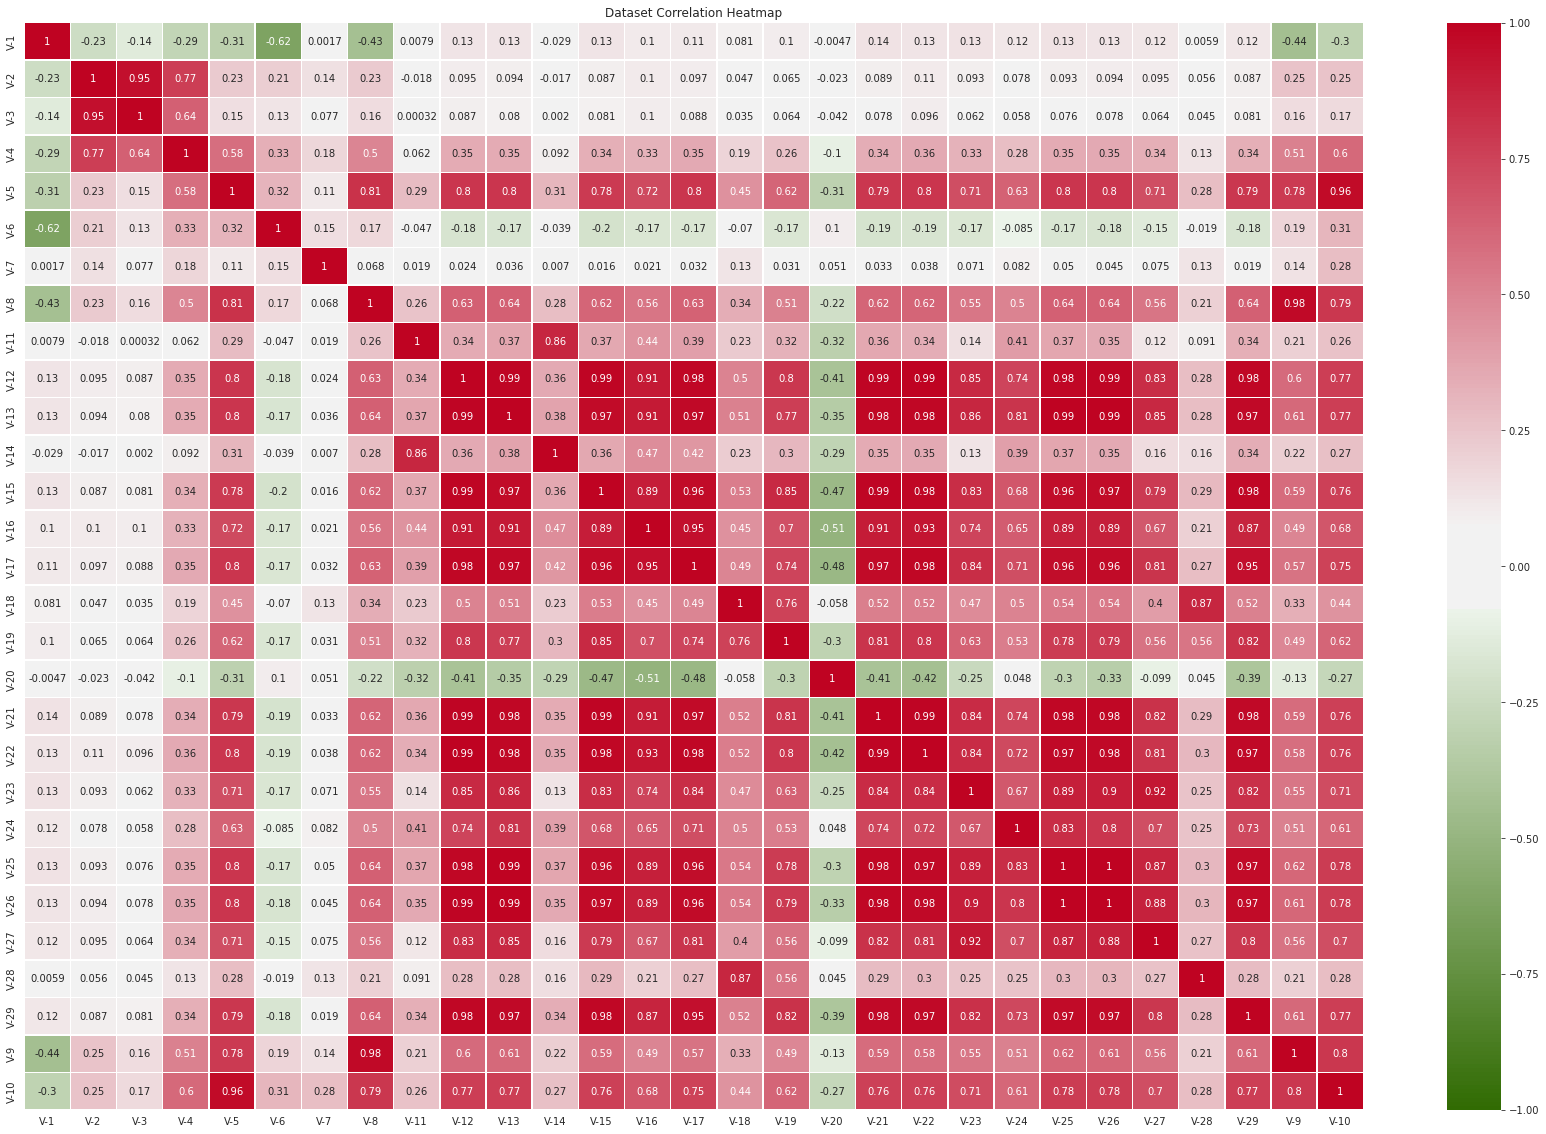



COVARIANCE MATRIX
                 V-1           V-2  ...           V-9          V-10
V-1       43.077030 -2.714491e+03  ... -3.444055e+03 -3.190905e+02
V-2    -2714.490620  3.248543e+06  ...  5.528775e+05  7.425123e+04
V-3     -444.140057  8.360807e+05  ...  9.666675e+04  1.316335e+04
V-4    -1061.184386  7.815665e+05  ...  3.486729e+05  5.518185e+04
V-5     -231.765644  4.598897e+04  ...  1.066091e+05  1.764091e+04
V-6    -1116.150529  1.051002e+05  ...  6.374900e+04  1.379984e+04
V-7        0.023933  5.386041e+02  ...  3.519788e+02  9.582982e+01
V-8    -2804.824943  4.187689e+05  ...  1.172742e+06  1.279306e+05
V-11      81.485692 -5.019834e+04  ...  3.968548e+05  6.774851e+04
V-12      39.446573  8.229015e+03  ...  3.466212e+04  6.003841e+03
V-13      33.999022  6.805428e+03  ...  2.951378e+04  5.065750e+03
V-14      -0.245874 -3.936188e+01  ...  3.396094e+02  5.777977e+01
V-15  357199.967601  6.598699e+07  ...  2.994384e+08  5.212834e+07
V-16    1814.087776  4.890980e+05  ...  1

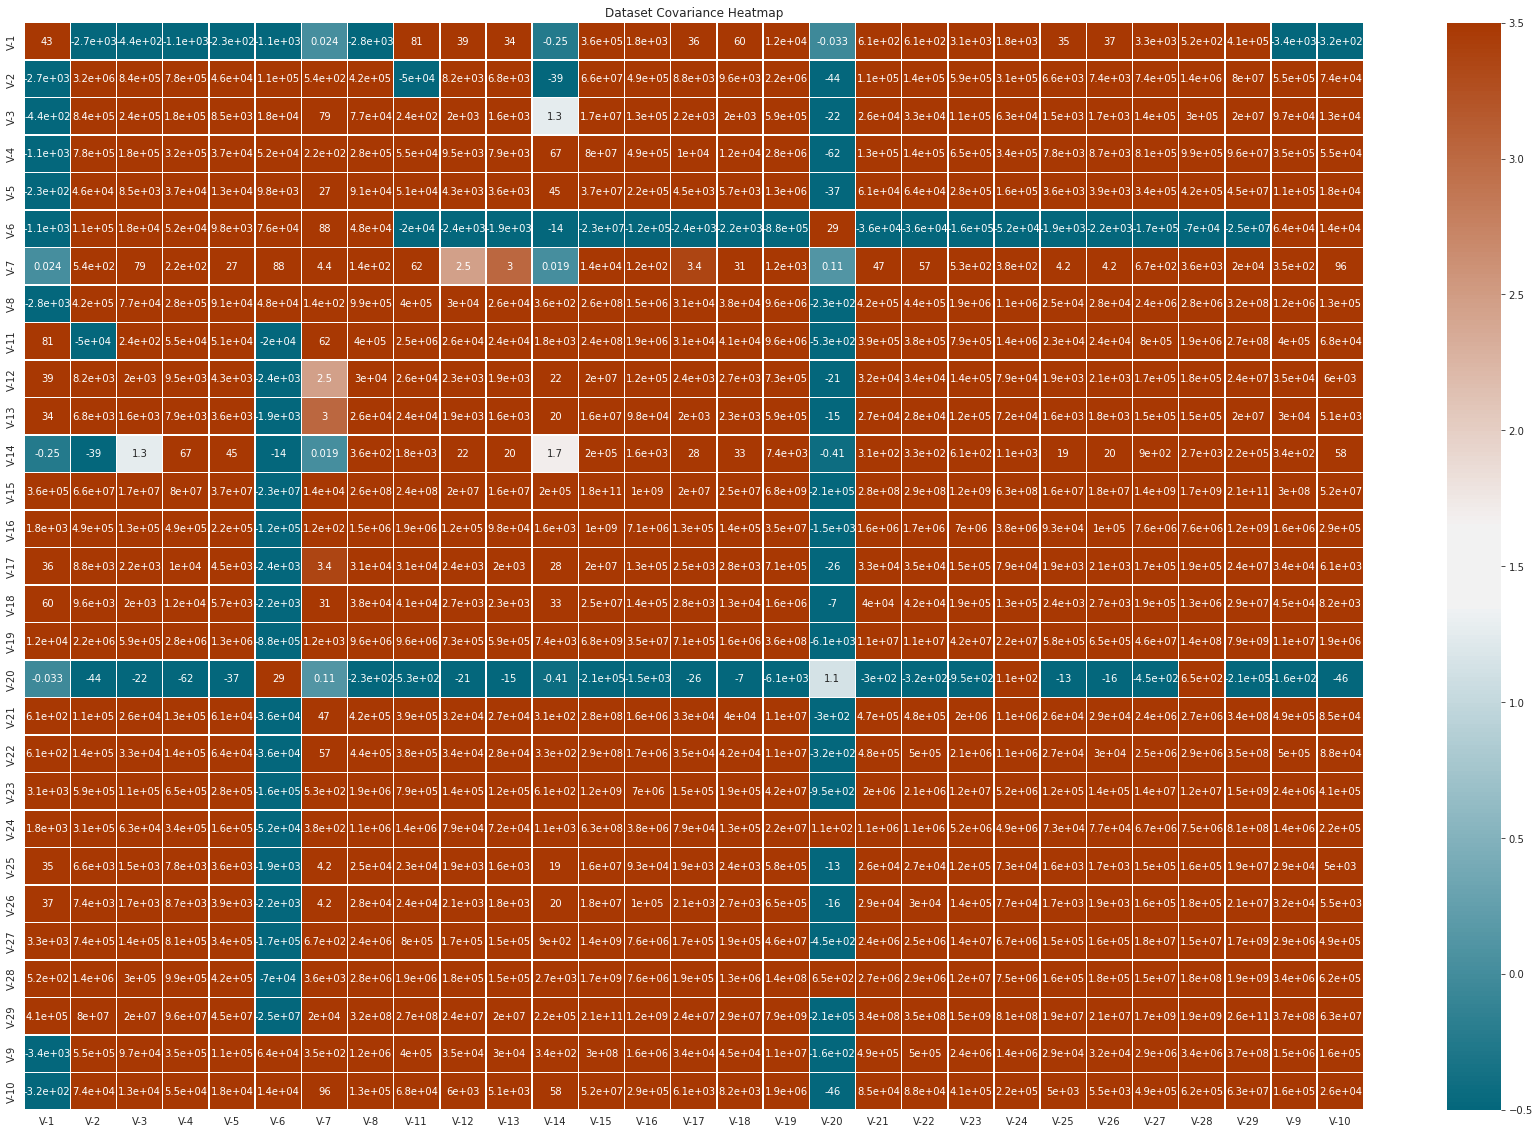

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (30,20))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap

sns.set_style('darkgrid')
plt.figure(figsize = (30,20))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).cov(), vmin = -0.5, vmax = 3.5, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Covariance Heatmap")
plt.show()

In [ ]:
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


In [ ]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 V-1     0
V-2     0
V-3     0
V-4     0
V-5     0
V-6     0
V-7     0
V-8     0
V-11    0
V-12    0
V-13    0
V-14    0
V-15    0
V-16    0
V-17    0
V-18    0
V-19    0
V-20    0
V-21    0
V-22    0
V-23    0
V-24    0
V-25    0
V-26    0
V-27    0
V-28    0
V-29    0
V-9     0
V-10    0
dtype: int64


# **Pre-processing -Skewness correction**

In [ ]:
# pick numerical variables and set them as X
X = df



In [ ]:
# Code for skewness correction (see source below)
# Depending upon the characteritics of a feature (column), a log, Box-Cox or power transform is applied to normalize the distribution 

# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 14:42:46 2019
@author: DATAmadness
"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness

# Further documentation available here:
# https://datamadness.github.io/Skewness_Auto_Transform

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()
                

    return DF


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-1' . Skewness = 0.25


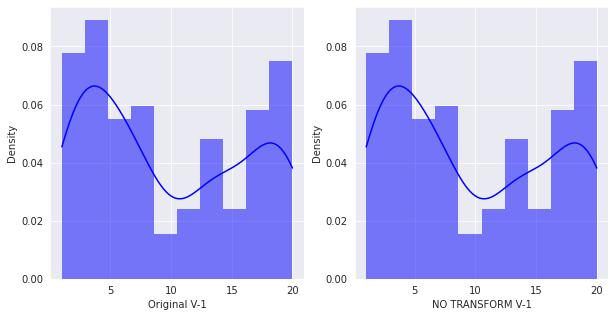


 ------------------------------------------------------

 'V-2' had 'positive' skewness of 3.99

 Transformation yielded skewness of 0.01


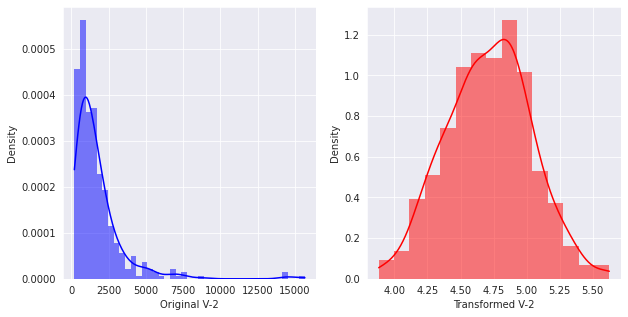


 ------------------------------------------------------

 'V-3' had 'positive' skewness of 5.67

 Transformation yielded skewness of -0.00


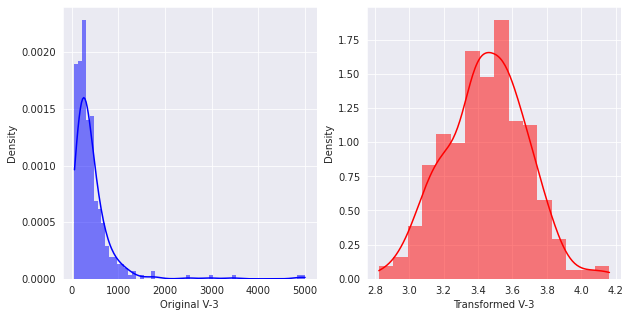


 ------------------------------------------------------

 'V-4' had 'positive' skewness of 6.51

 Transformation yielded skewness of -0.00


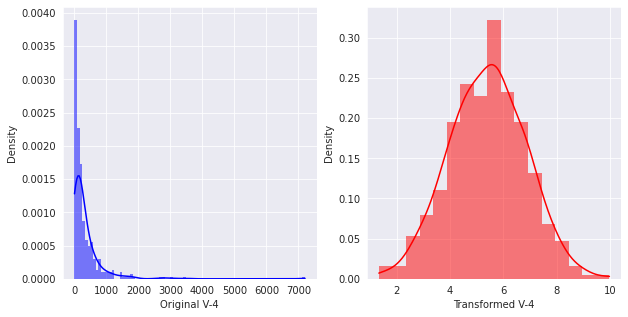


 ------------------------------------------------------

 'V-5' had 'positive' skewness of 1.14

 Transformation yielded skewness of -0.04


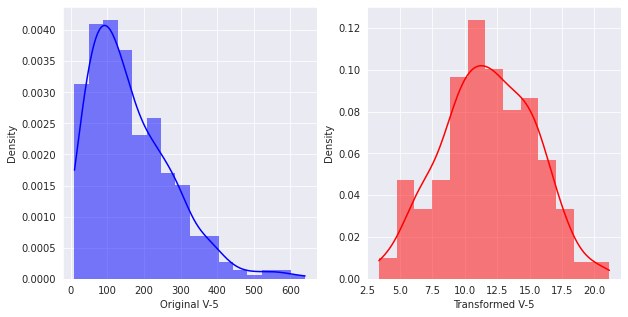


 ------------------------------------------------------

 'V-6' had 'positive' skewness of 4.60

 Transformation yielded skewness of -0.02


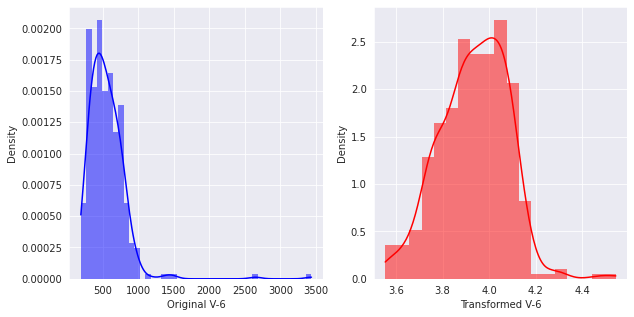


 ------------------------------------------------------

 'V-7' had 'positive' skewness of 2.44

 Transformation yielded skewness of -0.01


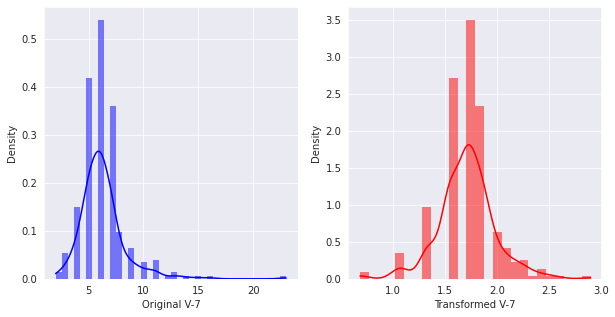


 ------------------------------------------------------

 'V-8' had 'positive' skewness of 2.06

 Transformation yielded skewness of -0.00


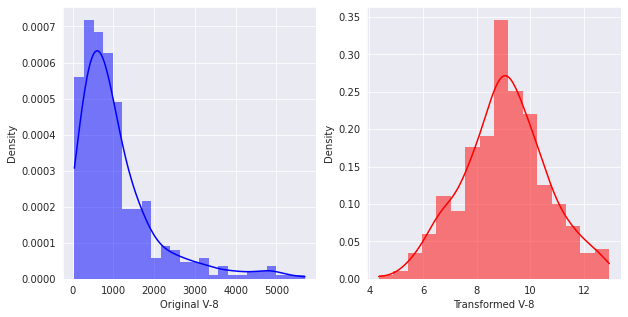


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-11' . Skewness = 0.81


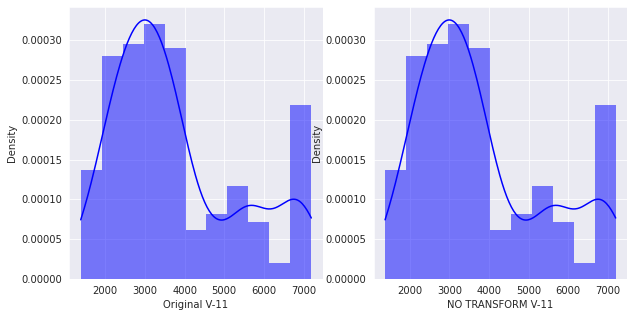


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-12' . Skewness = 0.78


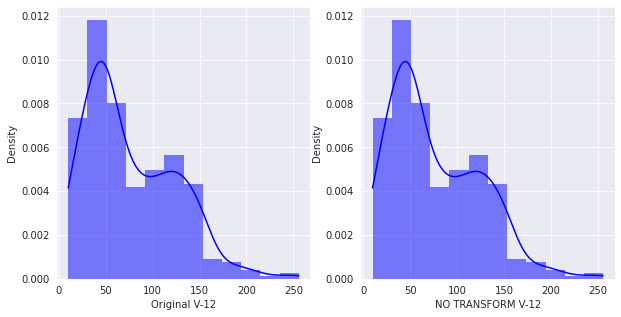


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-13' . Skewness = 0.47


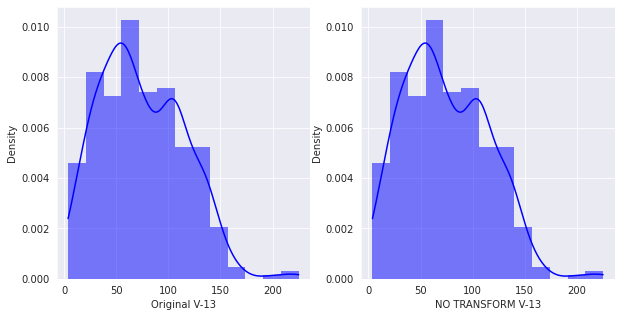


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-14' . Skewness = 0.86


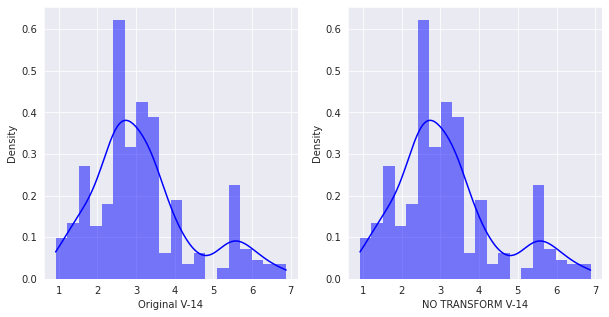


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-15' . Skewness = 0.96


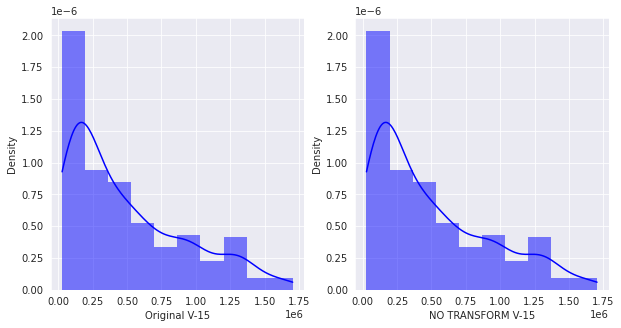


 ------------------------------------------------------

 'V-16' had 'positive' skewness of 1.78

 Transformation yielded skewness of -0.03


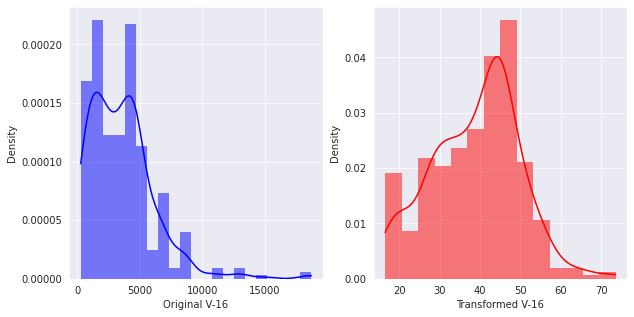


 ------------------------------------------------------

 'V-17' had 'positive' skewness of 1.20

 Transformation yielded skewness of -0.05


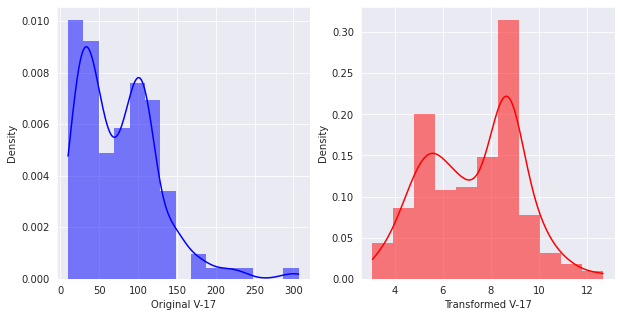


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-18' . Skewness = 0.74


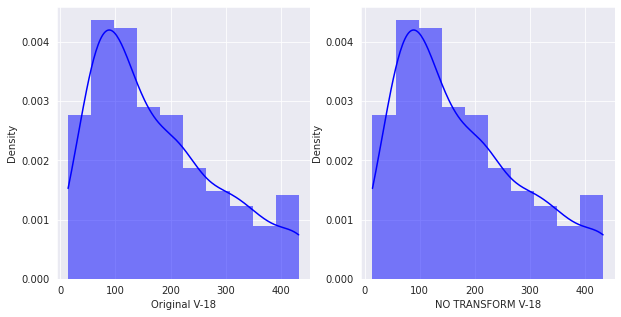


 ------------------------------------------------------

 'V-19' had 'positive' skewness of 1.88

 Transformation yielded skewness of -0.03


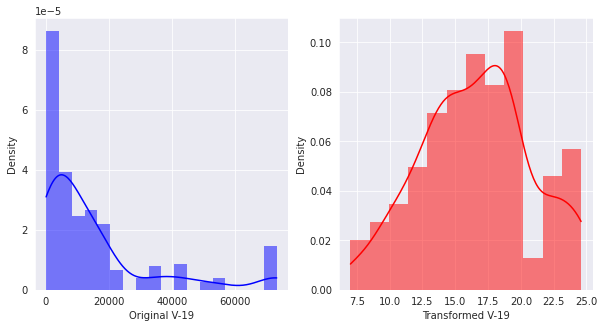


 ------------------------------------------------------

 'V-20' had 'negative' skewness of -2.23

 Transformation yielded skewness of -0.99


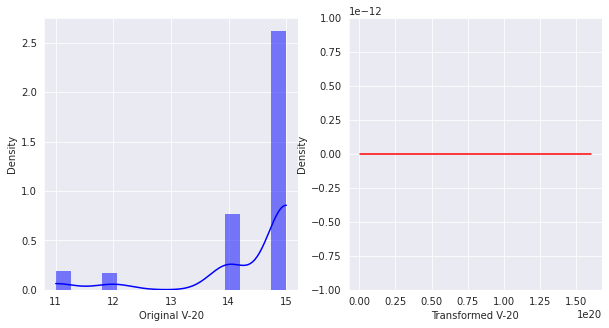


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-21' . Skewness = 0.73


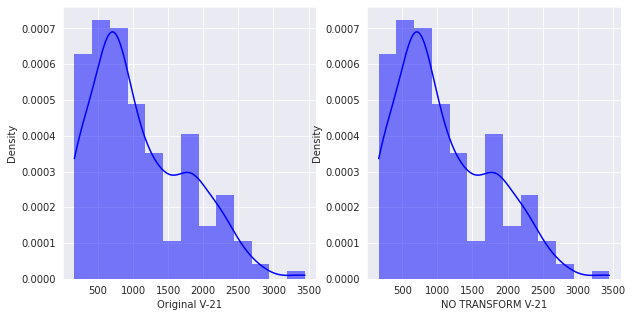


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-22' . Skewness = 0.85


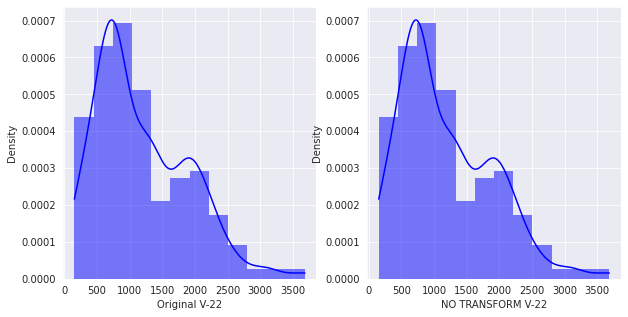


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-23' . Skewness = -0.06


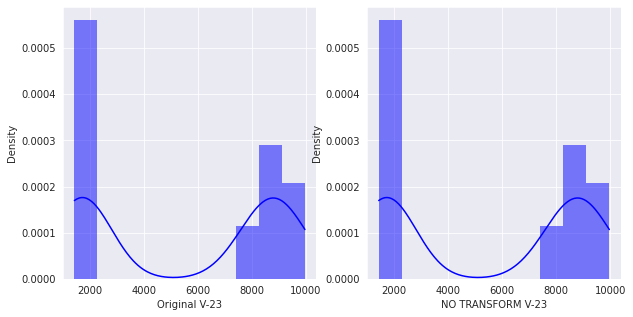


 ------------------------------------------------------

 'V-24' had 'negative' skewness of -1.34

 Transformation yielded skewness of -0.76


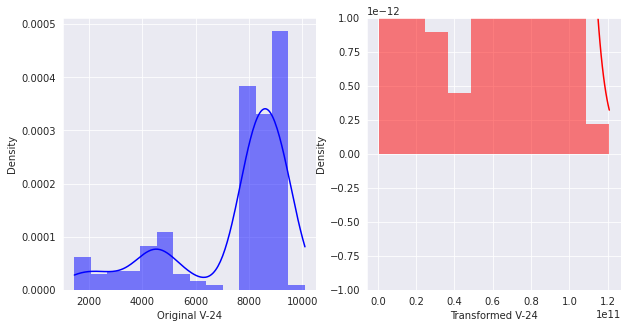


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-25' . Skewness = 0.20


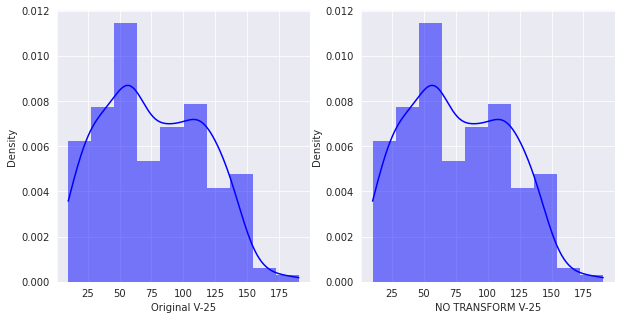


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-26' . Skewness = 0.31


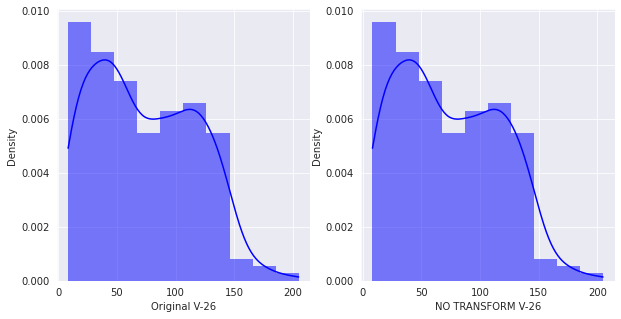


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-27' . Skewness = 0.25


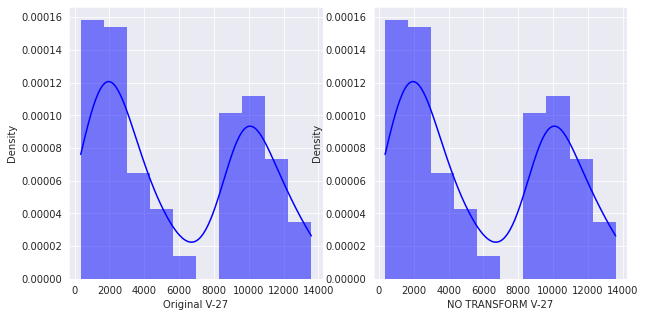


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-28' . Skewness = 0.07


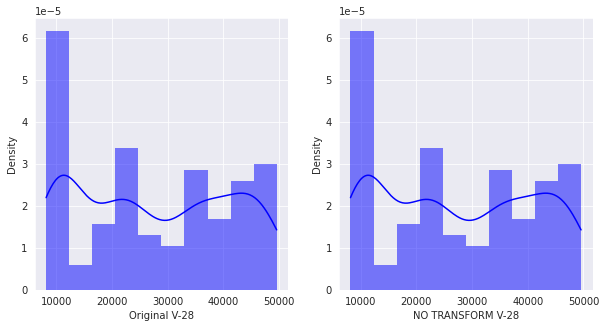


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-29' . Skewness = 0.80


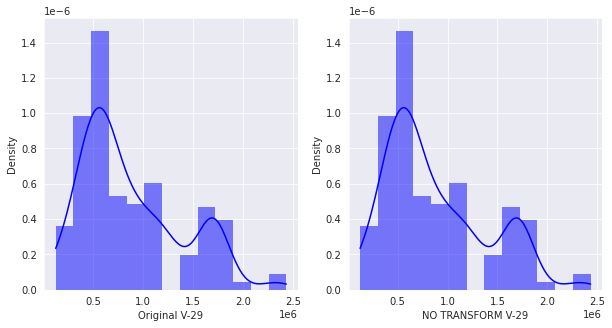


 ------------------------------------------------------

 'V-9' had 'positive' skewness of 1.88

 Transformation yielded skewness of -0.00


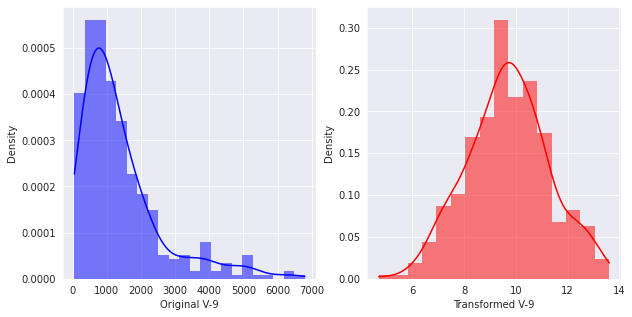


 ------------------------------------------------------

 'V-10' had 'positive' skewness of 1.26

 Transformation yielded skewness of -0.03


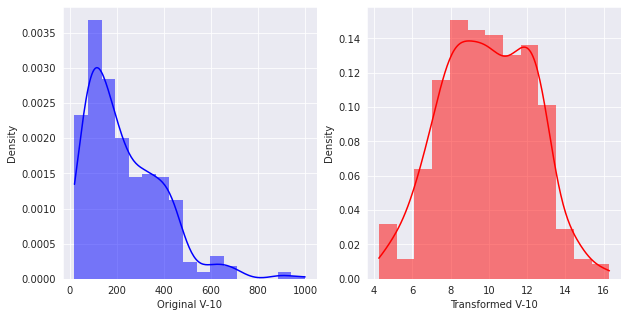

In [ ]:
# Use code above (adapted from https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame) to correct skewness
# All the predictors are real-valued, so we can push them all through the skewness check/correction.
X = skew_autotransform(X.copy(deep=True), plot = True, exp = False, threshold = 1)

#**Pre-processing-Outliers**

In [ ]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.

cols = X.columns
#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X,i)
  print("Column ",i,": ",outliers_Tukey)
  
# Windsorize X and check the results
print("Before", X.describe())
X_winsorized = X.copy(deep=True)
for i in cols:
  X_winsorized[i] = winsorize(X[i], limits=(0.05, 0.05))
print("After", X_winsorized.describe())

Column  V-1 :  []
Column  V-2 :  [1, 2, 11, 12, 13, 14, 17, 19, 26, 40, 42, 44, 56, 58, 59, 66, 67, 70, 77, 80, 81, 124, 137, 167, 272, 278, 339, 340, 341]
Column  V-3 :  [0, 1, 9, 12, 14, 17, 19, 26, 31, 44, 56, 58, 66, 67, 77, 80, 96, 124, 131, 137, 167, 272, 278, 339, 340, 341]
Column  V-4 :  [1, 4, 5, 6, 13, 14, 17, 18, 19, 21, 23, 28, 39, 40, 45, 55, 56, 58, 61, 62, 66, 67, 77, 78, 80, 81, 85, 86, 93, 99, 125, 131, 137, 146, 167, 329, 339, 340]
Column  V-5 :  [6, 7, 17, 18, 58, 61, 62, 86]
Column  V-6 :  [31, 57, 58, 87, 88, 240]
Column  V-7 :  [0, 1, 2, 4, 5, 6, 30, 56, 57, 58, 59, 90, 138, 143, 176, 208, 226, 240, 279, 296, 339, 362, 364]
Column  V-8 :  [1, 4, 5, 6, 7, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 28, 32, 51, 55, 60, 61, 62, 67, 76, 77, 78, 80, 85, 145, 146, 152, 155]
Column  V-11 :  []
Column  V-12 :  [62, 97, 342]
Column  V-13 :  [62, 97, 342]
Column  V-14 :  [0, 7, 25, 35, 36, 37, 43, 53, 61, 62, 83, 86, 92, 94, 113, 117, 119, 126, 130, 139, 151, 154, 156, 157,

In [ ]:
# Update result df with winzorized quant featires

def windorized(self):
  for ls in self:
    df[ls]=X_winsorized[ls]

lists = ['V-1','V-2','V-3','V-4','V-5','V-6','V-7','V-8','V-9','V-10','V-11',
           'V-12','V-13','V-14','V-15','V-16','V-17','V-18','V-19','V-20','V-21','V-22',
           'V-23','V-24','V-25','V-26','V-27','V-28','V-29']

windorized(lists)

In [ ]:
#Review columns
df.columns

Index(['V-1', 'V-2', 'V-3', 'V-4', 'V-5', 'V-6', 'V-7', 'V-8', 'V-11', 'V-12',
       'V-13', 'V-14', 'V-15', 'V-16', 'V-17', 'V-18', 'V-19', 'V-20', 'V-21',
       'V-22', 'V-23', 'V-24', 'V-25', 'V-26', 'V-27', 'V-28', 'V-29', 'V-9',
       'V-10'],
      dtype='object')

In [ ]:
#Separate predictors X and target y
x = pd.DataFrame(df.drop(['V-10'],axis=1))
y = pd.DataFrame(df['V-10'])
X = pd.concat([df['time'],X_quant,X_categorical],axis=1)

col_names = X.columns

KeyError: ignored

In [ ]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!

x_train, x_test, y_train, y_test =\
    train_test_split(x, y, 
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0)
print('Shape of x and y',x.shape, y.shape, '\nShape of training set X and y',x_train.shape, y_train.shape, '\nShape of test set X and y',x_test.shape, y_test.shape) 


Shape of x and y (372, 28) (372, 1) 
Shape of training set X and y (297, 28) (297, 1) 
Shape of test set X and y (75, 28) (75, 1)


In [ ]:
# Bringing features onto the same scale：normalization and standardization:

# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

# mms = MinMaxScaler()
# X_norm = mms.fit_transform(X)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc1 = StandardScaler()  
x_train_std = stdsc1.fit_transform(x_train)
x_test_std = stdsc1.transform(x_test)
stdsc2 = StandardScaler()  
y_train_std = stdsc2.fit_transform(y_train)
y_test_std = stdsc2.transform(y_test)

In [ ]:
# apply RFE on train_data to get important features

from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=4)
_ = rfe.fit(x_train_std, y_train)
print('Important Features\n',x.columns[rfe.support_])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Important Features
 Index(['V-4', 'V-5', 'V-6', 'V-9'], dtype='object')


In [ ]:
feature_names = [f"feature {i}" for i in range(x.shape[1])]
forest = RandomForestRegressor(random_state=0)
forest.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=0)

In [ ]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ValueError: ignored

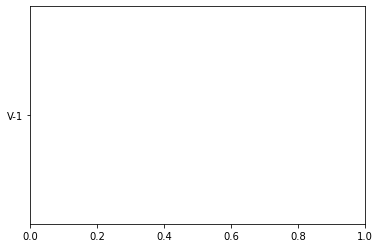

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
plt.barh(col_names, rf.feature_importances_)

In [ ]:
forest_importances

feature 0     0.001176
feature 1     0.002052
feature 2     0.001867
feature 3     0.002331
feature 4     0.933367
feature 5     0.007621
feature 6     0.006247
feature 7     0.001547
feature 8     0.001395
feature 9     0.002307
feature 10    0.002905
feature 11    0.001216
feature 12    0.001883
feature 13    0.006589
feature 14    0.001494
feature 15    0.000731
feature 16    0.002379
feature 17    0.000191
feature 18    0.001541
feature 19    0.002663
feature 20    0.002191
feature 21    0.001526
feature 22    0.002690
feature 23    0.001724
feature 24    0.000807
feature 25    0.000811
feature 26    0.000484
feature 27    0.008263
dtype: float64

In [ ]:
# Report performance
def Performance(actuals,predictions):
  print('MSE: %.2f ' % mean_squared_error(actuals, predictions))
  print('MAE: %.2f ' % mean_absolute_error(actuals,predictions)) 
  print('R^2: %.2f' % r2_score(actuals, predictions))

# Plotting the actuals vs predictions 
def PredsVsActuals(actuals,predictions):
  plt.plot(actuals, predictions, '.', color='blue')
  plt.xlabel('Actuals')
  plt.ylabel('Predictions')
  plt.show()

In [ ]:
# Loop through base learners
names = ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression','kNN', 'SVM','Multilayer Perceptron']
regressors = [linear_model.LinearRegression(),
              Lasso(alpha=0.5),
              Ridge(alpha=0.5),
              ElasticNet(alpha=0.25, l1_ratio=0.5),
              KNeighborsRegressor(n_neighbors=5),
              SVR(kernel = 'poly'),   #Can try kernels 'poly', 'linear' and 'sigmoid' kernels
              DecisionTreeRegressor(),
              MLPRegressor(hidden_layer_sizes=(150,150,1),
                       max_iter = 300,activation = 'relu',         
                       solver = 'adam')] 

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name,'\n')
  regr.fit(x_train_std, np.ravel(y_train_std))
  # Make predictions 
  y_pred_std = regr.predict(x_test_std)
  y_pred_std = pd.DataFrame(y_pred_std)
  y_pred = stdsc2.inverse_transform(y_pred_std)
  if name in ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression']:
      print('Coefficients: \n', regr.coef_)
  # Performance
  plt.figure(figsize=(10,8))
  Performance(y_test,y_pred)
  PredsVsActuals(y_test,y_pred)
  # Worst-case instance prediction
  y_pred = pd.DataFrame(y_pred) 
  results = pd.concat([y_pred, y_test.set_index(y_pred.index)], axis=1)
  results.columns=['Pred','Act']
  results['error'] = (results.Pred - results.Act)/results.Act
  print('Maximum error: ',100*np.max(results.error),'%\n\n')

In [ ]:
# Stacked Ensemble
# Code in this snippet adapted from https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('MLR', linear_model.LinearRegression()))
  level0.append(('Ridge', Ridge(alpha=0.5)))
  # define meta learner model
  level1 = linear_model.LinearRegression()
  # define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['Multiple Linear Regression'] = linear_model.LinearRegression()
  models['Ridge Regression'] = Ridge(alpha=0.5)
  return models

REGRESSOR:  Random Forest 

MSE: 2197.26 
MAE: 26.29 
R^2: 0.93


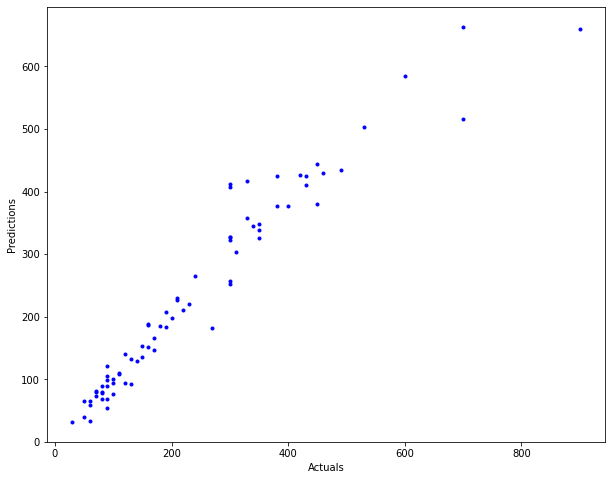

Maximum error:  37.40000000000002 %


REGRESSOR:  XGBoost 

MSE: 1260.56 
MAE: 21.67 
R^2: 0.96


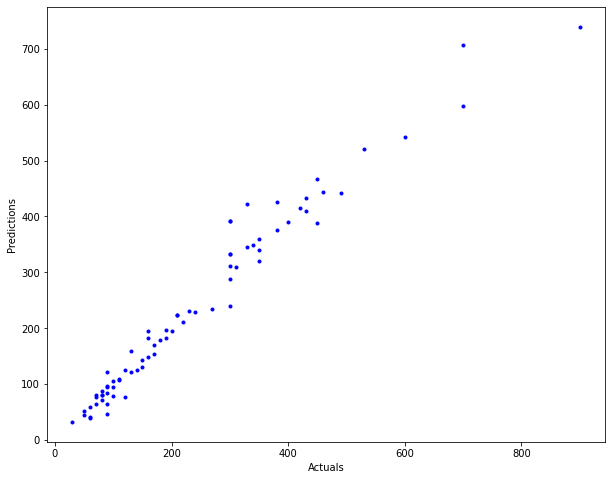

Maximum error:  36.1224110921224 %


REGRESSOR:  AdaBoost 

MSE: 2230.05 
MAE: 32.41 
R^2: 0.93


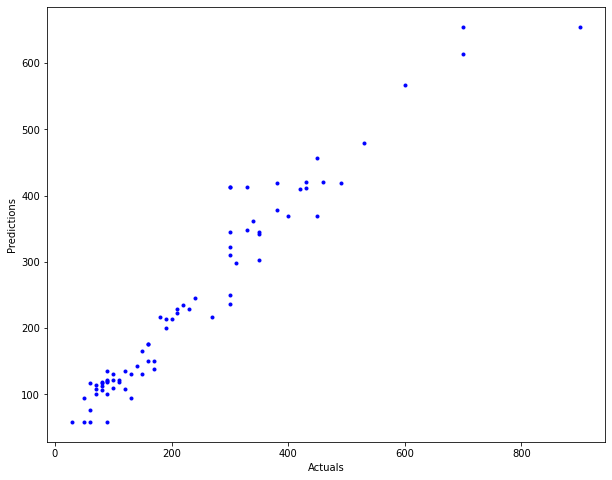

Maximum error:  96.09929078014193 %


REGRESSOR:  Stacked Ensemble 

MSE: 1015.43 
MAE: 21.05 
R^2: 0.97


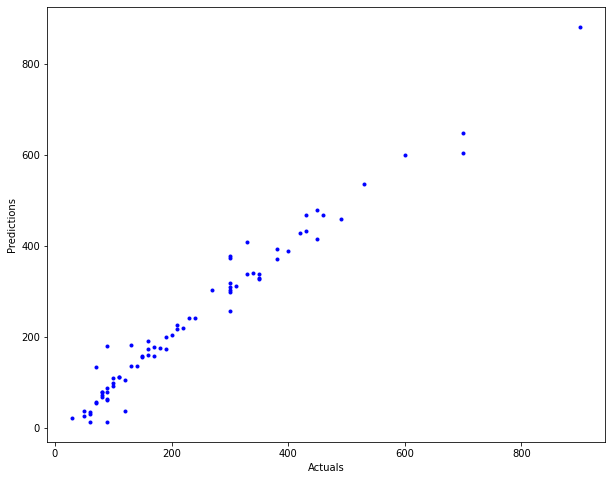

Maximum error:  98.81758264424276 %




In [ ]:
# Loop through ensembles and deep learning model
names = ['Random Forest', 'XGBoost', 'AdaBoost','Stacked Ensemble']
regressors = [RandomForestRegressor(),
              XGBRegressor(objective ='reg:squarederror'),
              AdaBoostRegressor(),
              get_stacking()   
              ] 

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name,'\n')
  regr.fit(x_train_std, np.ravel(y_train_std))
  # Make predictions 
  y_pred_std = regr.predict(x_test_std)
  y_pred_std = pd.DataFrame(y_pred_std)
  y_pred = stdsc2.inverse_transform(y_pred_std)
  # Performance
  plt.figure(figsize=(10,8))
  Performance(y_test,y_pred)
  PredsVsActuals(y_test,y_pred)
  # Worst-case instance prediction
  y_pred = pd.DataFrame(y_pred) 
  y_test = pd.DataFrame(y_test)
  results = pd.concat([y_pred, y_test.set_index(y_pred.index)], axis=1)
  results.columns=['Pred','Act']
  results['error'] = (results.Pred - results.Act)/results.Act
  print('Maximum error: ',100*np.max(results.error),'%\n\n')

In [ ]:

seed = 12345
np.random.seed(seed)
# define 10-fold cross validation test harness
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
MSE_scores = []
Worst_cases = []
for train, test in kfold.split(x, y):
    x_train = x.iloc[train]
    x_test = x.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    stdsc3 = StandardScaler()  
    x_train_std = stdsc3.fit_transform(x_train)
    x_test_std = stdsc3.transform(x_test)
    stdsc4 = StandardScaler()  
    y_train_std = stdsc4.fit_transform(y_train)
    y_test_std = stdsc4.transform(y_test)
    # create model  
    model = Sequential()
    model.add(Dense(50, input_dim=28, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
    # Fit the model
    model.fit(x_train_std, np.ravel(y_train_std), epochs=500, batch_size=10, verbose=0)
    # evaluate the model
    y_pred_std = regr.predict(x_test_std)
    y_pred_std = pd.DataFrame(y_pred_std)
    y_pred = stdsc4.inverse_transform(y_pred_std)
    # Performance
    mse_ = mean_squared_error(y_pred, y_test)
    MSE_scores.append(mse_)
    y_pred = pd.DataFrame(y_pred) 
    y_test = pd.DataFrame(y_test)
    results = pd.concat([y_pred, y_test.set_index(y_pred.index)], axis=1)
    results.columns=['Pred','Act']
    results['error'] = (results.Pred - results.Act)/results.Act
    error_ = 100*np.max(results.error)
    Worst_cases.append(error_)
    print('Fold: ',kfold, 'MSE: ',mse_, 'worst case instance:',error_)
print('SUMMARY:\nAverage MSE: ',np.mean(MSE_scores), 'Average worst case instance error %:',np.mean(Worst_cases))
 'V-2', 'V-3', 'V-4', 'V-5', 'V-6', 'V-7', 'V-8', 'V-11', 'V-12',
       'V-13', 'V-14', 'V-15', 'V-16', 'V-17', 'V-18', 'V-19', 'V-20', 'V-21',
       'V-22', 'V-23', 'V-24', 'V-25', 'V-26', 'V-27', 'V-28', 'V-29', 'V-9',
       'V-10'print('SUMMARY:\nStd dev. of MSE: ',np.std(MSE_scores), 'Std dev. of worst case instance error %:',np.std(Worst_cases))

IndentationError: ignored

In [ ]:
#Separate predictors X and target y
x = pd.DataFrame(df.drop([ 'V-4', 'V-5', 'V-6', 'V-9',
       'V-10'],axis=1))
y = pd.DataFrame(df['V-10'])

In [ ]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!

x_train, x_test, y_train, y_test =\
    train_test_split(x, y, 
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0)
print('Shape of x and y',x.shape, y.shape, '\nShape of training set X and y',x_train.shape, y_train.shape, '\nShape of test set X and y',x_test.shape, y_test.shape) 


Shape of x and y (372, 24) (372, 1) 
Shape of training set X and y (297, 24) (297, 1) 
Shape of test set X and y (75, 24) (75, 1)


In [ ]:
# Bringing features onto the same scale：normalization and standardization:

# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

# mms = MinMaxScaler()
# X_norm = mms.fit_transform(X)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc1 = StandardScaler()  
x_train_std = stdsc1.fit_transform(x_train)
x_test_std = stdsc1.transform(x_test)
stdsc2 = StandardScaler()  
y_train_std = stdsc2.fit_transform(y_train)
y_test_std = stdsc2.transform(y_test)

REGRESSOR:  Multiple Linear Regression 

Coefficients: 
 [-3.21286605e-01 -7.11138910e-02  1.03370852e-01  1.53869441e-01
  1.57869126e-01 -2.29641665e-02  3.25189313e-01  1.79814822e-01
  4.56549635e-04  3.50085787e-01  6.62645672e-02 -2.99436600e-01
  6.67140936e-02 -1.30464115e-01 -3.12443903e-02 -1.46294410e-01
 -7.90541455e-02  6.55553842e-02 -8.99943953e-02  6.79259344e-01
 -2.83884801e-01  1.03553351e-01  2.66232644e-02 -2.71127334e-02]
MSE: 1574.48 
MAE: 31.32 
R^2: 0.92


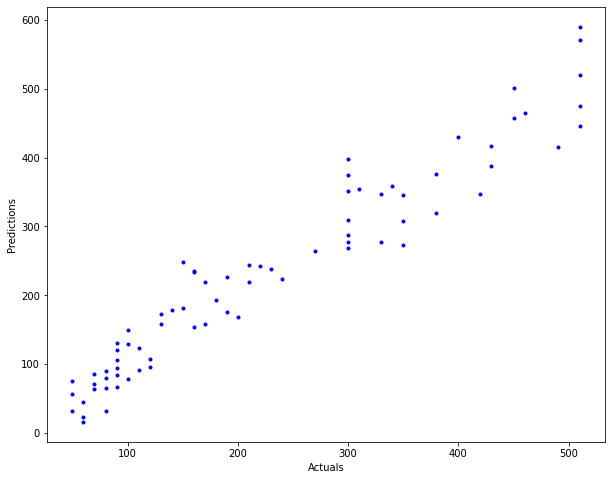

Maximum error:  65.46797870949396 %


REGRESSOR:  Lasso Regression 

Coefficients: 
 [-0.          0.          0.          0.          0.15681799  0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.          0.          0.
  0.          0.          0.22662061  0.          0.          0.        ]
MSE: 9381.43 
MAE: 83.58 
R^2: 0.55


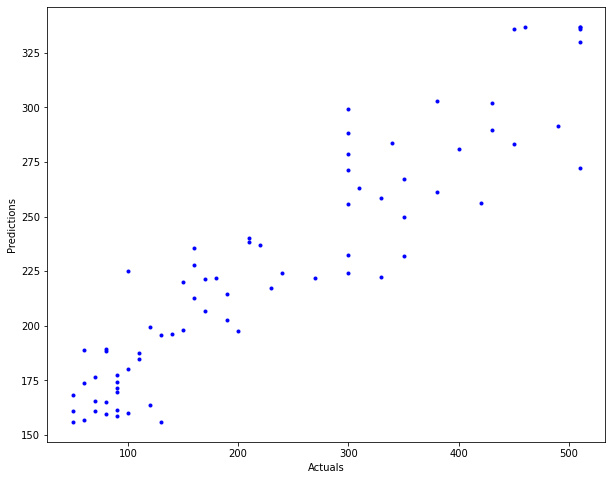

Maximum error:  236.84821811502968 %


REGRESSOR:  Ridge Regression 

Coefficients: 
 [-0.3195765  -0.06694799  0.09881288  0.15345428  0.16006025 -0.01228502
  0.20668021  0.15721164 -0.0048688   0.15055555  0.04554546 -0.12165999
  0.05062104 -0.09811537 -0.0197362  -0.09049258  0.00433235  0.06889737
 -0.04988426  0.15197494  0.10882131  0.09394188  0.0243441   0.10857994]
MSE: 1569.12 
MAE: 31.25 
R^2: 0.92


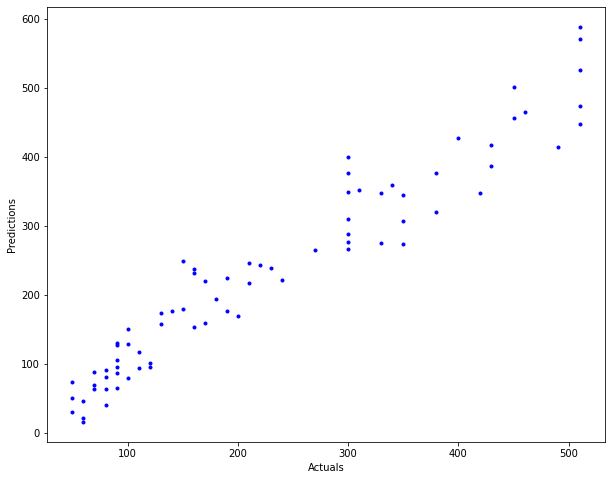

Maximum error:  65.74752999428449 %


REGRESSOR:  ElasticNet Regression 

Coefficients: 
 [-0.11525805  0.          0.          0.00828148  0.23805379  0.
  0.05877213  0.06837184  0.          0.01844189  0.          0.04265995
  0.          0.         -0.          0.01973204  0.04296897  0.0687819
  0.          0.06902902  0.07587081  0.05906231  0.          0.0527011 ]
MSE: 2667.08 
MAE: 41.65 
R^2: 0.87


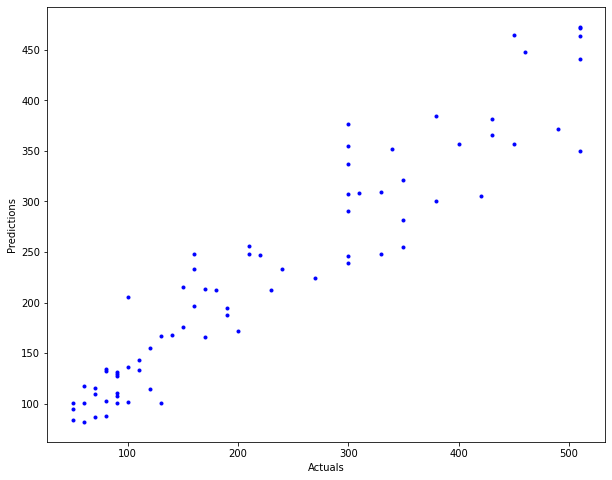

Maximum error:  105.21226001852256 %


REGRESSOR:  kNN 

MSE: 2519.44 
MAE: 35.36 
R^2: 0.88


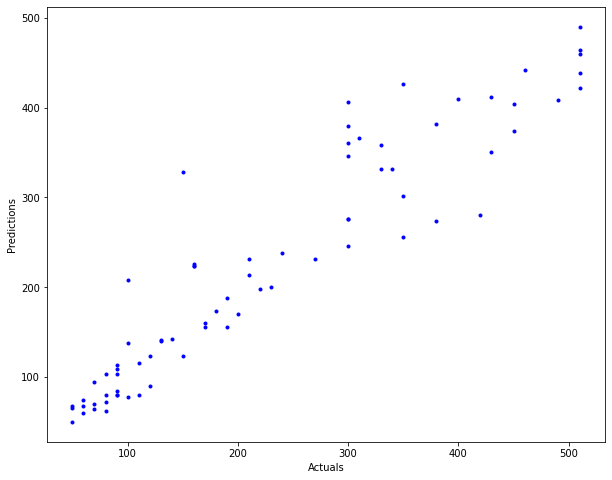

Maximum error:  118.66666666666667 %


REGRESSOR:  SVM 

MSE: 2071.19 
MAE: 34.22 
R^2: 0.90


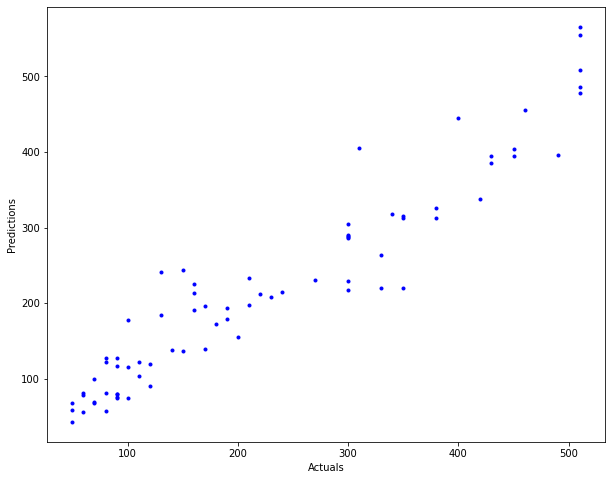

Maximum error:  85.79849670257525 %


REGRESSOR:  Multilayer Perceptron 

MSE: 5122.67 
MAE: 48.53 
R^2: 0.75


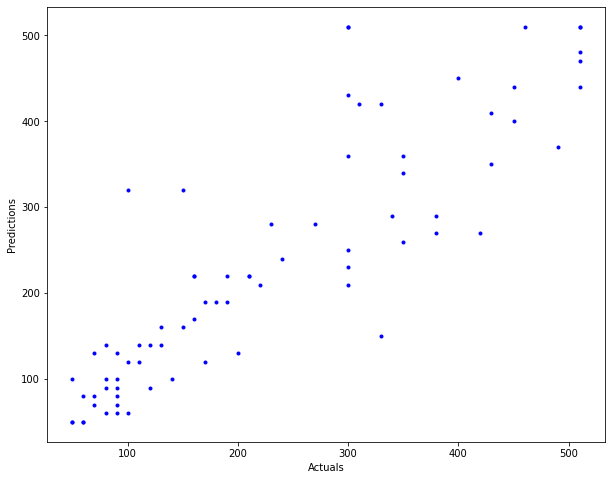

Maximum error:  220.00000000000003 %




In [ ]:
# Loop through base learners
names = ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression','kNN', 'SVM','Multilayer Perceptron']
regressors = [linear_model.LinearRegression(),
              Lasso(alpha=0.5),
              Ridge(alpha=0.5),
              ElasticNet(alpha=0.25, l1_ratio=0.5),
              KNeighborsRegressor(n_neighbors=5),
              SVR(kernel = 'poly'),   #Can try kernels 'poly', 'linear' and 'sigmoid' kernels
              DecisionTreeRegressor(),
              MLPRegressor(hidden_layer_sizes=(150,150,1),
                       max_iter = 300,activation = 'relu',         
                       solver = 'adam')] 

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name,'\n')
  regr.fit(x_train_std, np.ravel(y_train_std))
  # Make predictions 
  y_pred_std = regr.predict(x_test_std)
  y_pred_std = pd.DataFrame(y_pred_std)
  y_pred = stdsc2.inverse_transform(y_pred_std)
  if name in ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression']:
      print('Coefficients: \n', regr.coef_)
  # Performance
  plt.figure(figsize=(10,8))
  Performance(y_test,y_pred)
  PredsVsActuals(y_test,y_pred)
  # Worst-case instance prediction
  y_pred = pd.DataFrame(y_pred) 
  results = pd.concat([y_pred, y_test.set_index(y_pred.index)], axis=1)
  results.columns=['Pred','Act']
  results['error'] = (results.Pred - results.Act)/results.Act
  print('Maximum error: ',100*np.max(results.error),'%\n\n')

In [ ]:
# Stacked Ensemble
# Code in this snippet adapted from https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('MLR', linear_model.LinearRegression()))
  level0.append(('Ridge', Ridge(alpha=0.5)))
  # define meta learner model
  level1 = linear_model.LinearRegression()
  # define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['Multiple Linear Regression'] = linear_model.LinearRegression()
  models['Ridge Regression'] = Ridge(alpha=0.5)
  return models

REGRESSOR:  Random Forest 

MSE: 2320.61 
MAE: 35.26 
R^2: 0.89


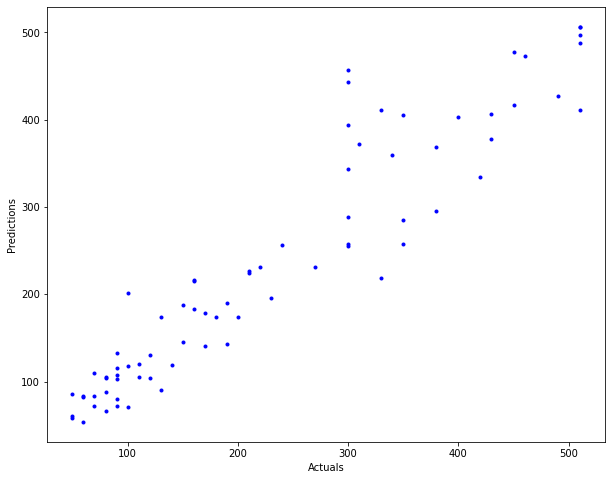

Maximum error:  101.69999999999999 %


REGRESSOR:  XGBoost 

MSE: 2586.60 
MAE: 37.01 
R^2: 0.88


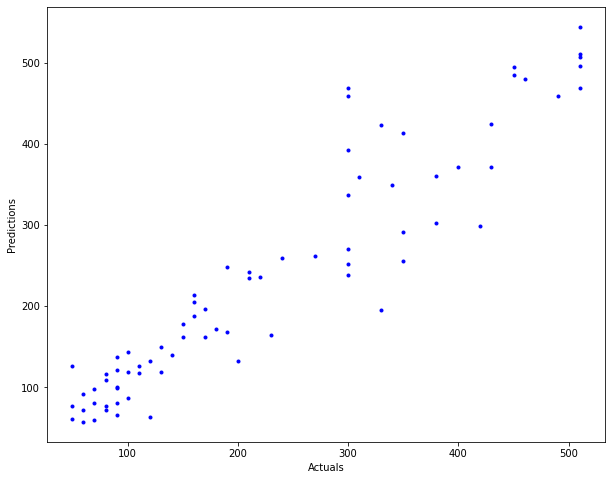

Maximum error:  151.54908752441406 %


REGRESSOR:  AdaBoost 

MSE: 2942.56 
MAE: 44.78 
R^2: 0.86


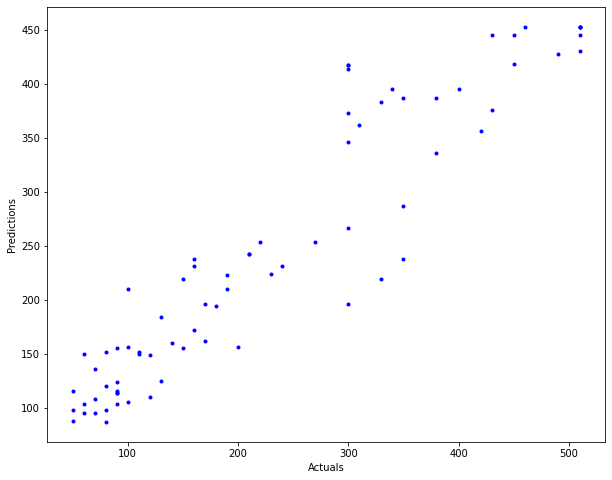

Maximum error:  150.07716049382722 %


REGRESSOR:  Stacked Ensemble 

MSE: 1606.98 
MAE: 31.66 
R^2: 0.92


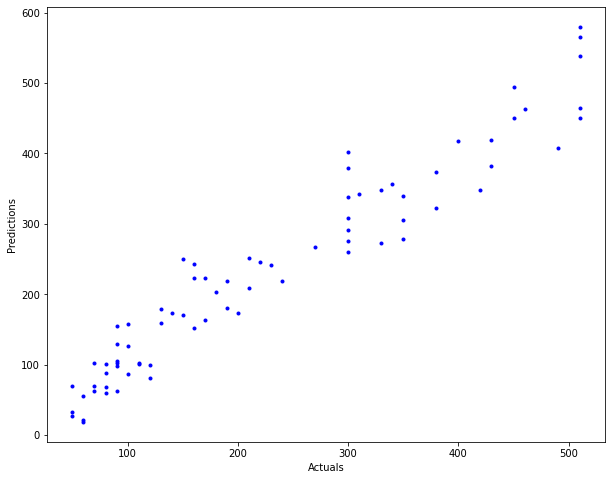

Maximum error:  71.90936176895416 %




In [ ]:
# Loop through ensembles and deep learning model
names = ['Random Forest', 'XGBoost', 'AdaBoost','Stacked Ensemble']
regressors = [RandomForestRegressor(),
              XGBRegressor(objective ='reg:squarederror'),
              AdaBoostRegressor(),
              get_stacking()   
              ] 

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name,'\n')
  regr.fit(x_train_std, np.ravel(y_train_std))
  # Make predictions 
  y_pred_std = regr.predict(x_test_std)
  y_pred_std = pd.DataFrame(y_pred_std)
  y_pred = stdsc2.inverse_transform(y_pred_std)
  # Performance
  plt.figure(figsize=(10,8))
  Performance(y_test,y_pred)
  PredsVsActuals(y_test,y_pred)
  # Worst-case instance prediction
  y_pred = pd.DataFrame(y_pred) 
  y_test = pd.DataFrame(y_test)
  results = pd.concat([y_pred, y_test.set_index(y_pred.index)], axis=1)
  results.columns=['Pred','Act']
  results['error'] = (results.Pred - results.Act)/results.Act
  print('Maximum error: ',100*np.max(results.error),'%\n\n')

**BLUF**

We first found the feature importance through the random forest feature importance
We chose to find the base model with all predictors first and chose two of the best ones which were redge and MLR
We then stacked them and found the best deep learning models which were stacked ensamble and random forest
we then chose the best predictors and ran the model again and we found the best deep learning models whcih were stacked ensamble and random forest again with r^2 of .95 and .94 respectivly
